In [148]:
from matplotlib import pyplot as plt
from pyaxols.aio.csv import read_csv
from pyaxols.aio.json import read_json

In [149]:
t1819 = read_csv("report_2018-2019.csv")
t1819.drop_nones()

print(t1819.head(10))

+----+----------------+---------------------+--------+---------+------------------+------------------+---------------------------+--------------------------------+--------------+-----------------------------+
|    |   Overall rank | Country or region   |   Year |   Score |   GDP per capita |   Social support |   Healthy life expectancy |   Freedom to make life choices |   Generosity |   Perceptions of corruption |
|----+----------------+---------------------+--------+---------+------------------+------------------+---------------------------+--------------------------------+--------------+-----------------------------|
|  0 |            154 | Afghanistan         |   2019 |   3.203 |            0.35  |            0.517 |                     0.361 |                          0     |        0.158 |                       0.025 |
|  1 |            145 | Afghanistan         |   2018 |   3.632 |            0.332 |            0.537 |                     0.255 |                          0.085 | 

In [150]:
t1819["Overall rank"] = t1819["Overall rank"].as_type(int)
t1819["Year"] = t1819["Year"].as_type(int)
t1819["Score"] = t1819["Score"].as_type(float)
t1819["GDP per capita"] = t1819["GDP per capita"].as_type(float)
t1819["Social support"] = t1819["Social support"].as_type(float)
t1819["Healthy life expectancy"] = t1819["Healthy life expectancy"].as_type(float)
t1819["Freedom to make life choices"] = t1819["Freedom to make life choices"].as_type(float)
t1819["Generosity"] = t1819["Generosity"].as_type(float)
t1819["Perceptions of corruption"] = t1819["Perceptions of corruption"].as_type(float)

In [151]:
t18, t19 = t1819.group_by("Year")

In [152]:
eu_countries = read_json("eu-countries.json")

eu18 = t18.inner_join(
    other=eu_countries,
    other_on="name",
    self_on="Country or region",
)

eu19 = t19.inner_join(
    other=eu_countries,
    other_on="name",
    self_on="Country or region",
)

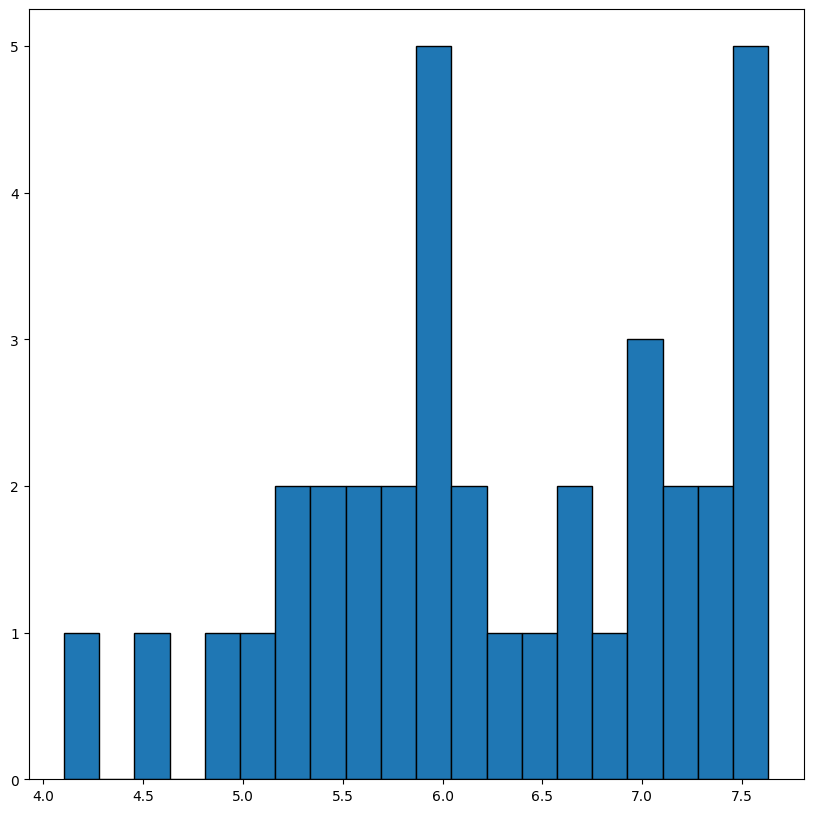

In [161]:
eu18["Score"].hist(bins=20, edgecolor='k')

+----+--------------------------------+
|    |   Freedom to make life choices |
|----+--------------------------------|
|  0 |                          0.131 |
|  1 |                          0.163 |
|  2 |                          0.232 |
|  3 |                          0.259 |
|  4 |                          0.28  |
|  5 |                          0.281 |
|  6 |                          0.35  |
|  7 |                          0.354 |
|  8 |                          0.359 |
|  9 |                          0.363 |
| 10 |                          0.38  |
| 11 |                          0.394 |
| 12 |                          0.419 |
| 13 |                          0.423 |
| 14 |                          0.449 |
| 15 |                          0.464 |
| 16 |                          0.52  |
| 17 |                          0.528 |
| 18 |                          0.543 |
| 19 |                          0.546 |
| 20 |                          0.553 |
| 21 |                          0.562 |


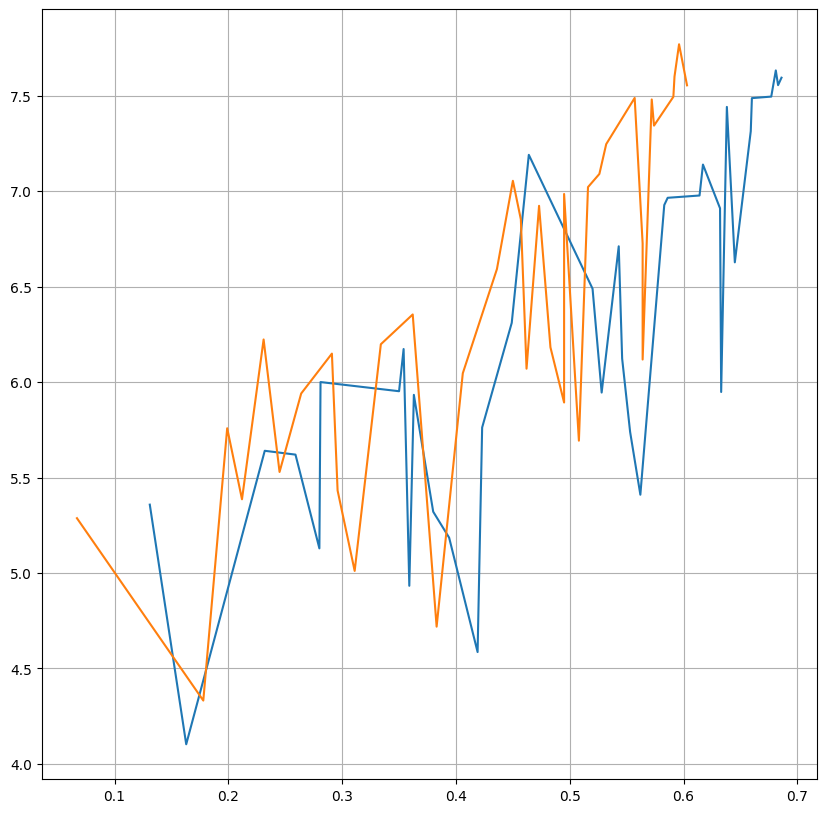

In [155]:
plt.rcParams["figure.figsize"] = (10, 10)
plt.grid(True)

eu18.plot(
    x="Freedom to make life choices",
    y="Score",
)

eu19.plot(
    x="Freedom to make life choices",
    y="Score",
)

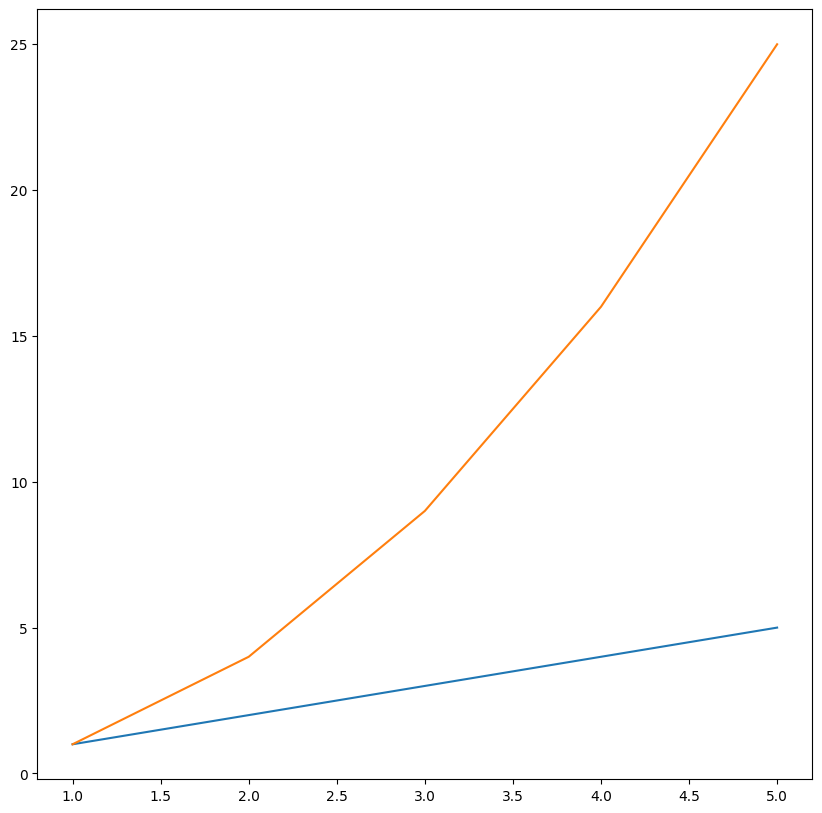

In [156]:
x = [1, 2, 3, 4, 5]
y = [1, 2, 3, 4, 5]
y1 = [1, 4, 9, 16, 25]
plt.plot(x, y)
plt.plot(x, y1)
plt.show()